#**Project Name - Zomato Restaurants Analysis**
##**Project Type - Exploratory Data Analysis (EDA)**

####**Done By - Rajesh Challa**


##**Background**
- This dataset provides a comprehensive view of the restaurant scene in the 13 metropolitan areas of India( 900
restaurants) . Researchers, analysts, and food enthusiasts can use this dataset to gain insights into various
aspects such as dining and delivery ratings, customer reviews and preferences, popular cuisines, best-selling
items, and pricing information across different cities.

- It enables the exploration of dining patterns, the comparison of restaurants and cuisines between cities, and the identification of trends in the food industry. This dataset serves as a valuable resource for understanding the culinary landscape and making data-driven decisions related to the restaurant business, customer satisfaction, and food choices in these metropolitan areas of India.

#**Objectives**



####**1. Performances**

1. Top 10 Restaurants by Dining Rating?
2. Bottom 10 Restaurants by Dining Rating?
3. Top 10 expensive places to dine in?
4. Which restaurants have the highest combined dining and delivery ratings?
5. Top 10 resaurants based on best selling items?
6. Cities with maximum restaurants?

####**2. Customer insights**

7. Popular dishes in india?
8. Which cuisines is most popular in each city?
9. Which individual dishes most popular in each city?
10. Most expensive Cuisine by city?

####**3. Operational efficiency**

11. Are there differences in ratings and customer satisfaction for dining versus delivery services?
12. How does menu diversity or complexity impact customer satisfaction?
13. Which restaurants demonstrate better efficiency in handling both dine-in and delivery operations?
14. Is good Delivery Rating leads to good Dining Rating or vice-versa?


Twitter header - 7.png

###**Importing the necessary libraries and Loading up data**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('zomato_dataset.csv')

In [75]:
df.head()

Restaurant Name  Dining Rating  Delivery Rating  Dining Votes  \
0      Doner King            3.9              4.2            39   
1      Doner King            3.9              4.2            39   
2      Doner King            3.9              4.2            39   
3      Doner King            3.9              4.2            39   
4      Doner King            3.9              4.2            39   

   Delivery Votes   Cuisine  Place Name        City                 Item Name  \
0               0  Fast Food   Malakpet   Hyderabad       Platter Kebab Combo   
1               0  Fast Food   Malakpet   Hyderabad   Chicken Rumali Shawarma   
2               0  Fast Food   Malakpet   Hyderabad    Chicken Tandoori Salad   
3               0  Fast Food   Malakpet   Hyderabad         Chicken BBQ Salad   
4               0  Fast Food   Malakpet   Hyderabad  Special Doner Wrap Combo   

  Best Seller  Votes  Prices  
0  BESTSELLER     84   249.0  
1  BESTSELLER     45   129.0  
2         NaN     39   189.0  
3  BESTSELLER     43   189.0  
4    MUST TRY     31   205.0

###**About the dataset- Zomato Restaurants Dataset for Metropolitan Areas**

- This dataset provides a comprehensive view of the restaurant scene in the 13 metropolitan areas of India( 900 restaurants)

- In this dataset, we have more than 127000 rows and 12 columns, a fairly large dataset.

- The Data includes both categorical and numeric values, providing a diverse range of information.

- It enables the exploration of dining patterns, the comparison of restaurants and cuisines between cities, and the identification of trends in the food industry.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


###**Understanding the features**

#####**Restaurant Name:** The name of the restaurant.
#####**Dining Rating:** The rating given by customers for the dining experience at the restaurant.
#####**Delivery Rating:** The rating given by customers for the delivery service provided by the restaurant.
#####**Dining Votes:** The number of votes or reviews received for the dining experience.
#####**Delivery Votes:** The number of votes or reviews received for the delivery service.
#####**Cuisine:** The type of cuisine or culinary style offered by the restaurant.
#####**Place:** The name of the place where the restaurant is located in a city.  
#####**City Name:** The name of the metropolitan area or city where the restaurant is located.
#####**Item Name:** The name of a specific dish or item offered by the restaurant.
#####**Best Seller:** Indicates whether the item is a best-selling dish or not.
#####**Votes:** The number of votes or reviews received for the specific item.
#####**Prices:** The prices associated with each item offered by the restaurant.


In [77]:
df.shape

(123657, 12)

##**Data Exploration and Data Cleaning**

1. Handle missing values
2. Renaming Columns (to remove spaces)
3. Handle  duplicates
4. Exploring Data

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


In [79]:
df.isnull().sum()

Restaurant Name        0
Dining Rating      32236
Delivery Rating     1280
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64

####**1. Handle missing values**

In [80]:
df['Dining Rating'].mean()

np.float64(3.822264031240087)

In [81]:
df['Delivery Rating'].mean()

np.float64(3.9631842584799433)

In [82]:
df['Best Seller'].mode()

0    BESTSELLER
Name: Best Seller, dtype: object

In [83]:
#1. Handle missing values
#columns in focus- Dining Rating, Delivery Rating, Best Seller

#as Delivery Rating missing values is more than 20% we can consider filling with 0
df['Delivery Rating'] = df['Delivery Rating'].fillna(0)

#as dining rating missing values is very low, we can fill it with mean
df['Dining Rating'] = df['Dining Rating'].fillna(df['Dining Rating'].mean())




In [84]:
df.isnull().sum()

Restaurant Name        0
Dining Rating          0
Delivery Rating        0
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64

In [85]:
print(df['Best Seller'].isnull().sum())
df['Best Seller'].value_counts()

95715


Best Seller
BESTSELLER                  16992
MUST TRY                     4151
Not eligible for coupons     2440
CHEF'S SPECIAL               1822
SPICY                        1254
Not on Pro                    657
NEW                           455
SEASONAL                       91
Eggless available              34
VEGAN                          26
GLUTEN FREE                     9
FODMAP FRIENDLY                 9
DAIRY FREE                      2
Name: count, dtype: int64

####**As best sellers are not always present in the menu, we have missing values. To deal with missing values, we can create a new type as Regular.**

In [86]:

df['Best Seller'] = df['Best Seller'].fillna('Regular')

In [87]:
df['Best Seller'].value_counts()

Best Seller
Regular                     95715
BESTSELLER                  16992
MUST TRY                     4151
Not eligible for coupons     2440
CHEF'S SPECIAL               1822
SPICY                        1254
Not on Pro                    657
NEW                           455
SEASONAL                       91
Eggless available              34
VEGAN                          26
GLUTEN FREE                     9
FODMAP FRIENDLY                 9
DAIRY FREE                      2
Name: count, dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    123657 non-null  float64
 2   Delivery Rating  123657 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      123657 non-null  object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


####**2.Renaming Columns (to remove spaces)**

In [89]:
df.columns = df.columns.str.replace(' ', '')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   RestaurantName  123657 non-null  object 
 1   DiningRating    123657 non-null  float64
 2   DeliveryRating  123657 non-null  float64
 3   DiningVotes     123657 non-null  int64  
 4   DeliveryVotes   123657 non-null  int64  
 5   Cuisine         123657 non-null  object 
 6   PlaceName       123657 non-null  object 
 7   City            123657 non-null  object 
 8   ItemName        123657 non-null  object 
 9   BestSeller      123657 non-null  object 
 10  Votes           123657 non-null  int64  
 11  Prices          123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


####**3. Removing duplicates**


In [91]:
# check duplicate rows in dataset
b_df = df.drop_duplicates()
b_df.count()

RestaurantName    101530
DiningRating      101530
DeliveryRating    101530
DiningVotes       101530
DeliveryVotes     101530
Cuisine           101530
PlaceName         101530
City              101530
ItemName          101530
BestSeller        101530
Votes             101530
Prices            101530
dtype: int64

In [92]:
df.shape

(123657, 12)

In [93]:
#looks like no duplicates are present in the data
df[df.duplicated()].head(10)

RestaurantName  DiningRating  DeliveryRating  DiningVotes  DeliveryVotes  \
15     Doner King           3.9             4.2           39              0   
16     Doner King           3.9             4.2           39              0   
19     Doner King           3.9             4.2           39              0   
20     Doner King           3.9             4.2           39              0   
21     Doner King           3.9             4.2           39              0   
27     Doner King           3.9             4.2           39              0   
34     Doner King           3.9             4.2           39              0   
36     Doner King           3.9             4.2           39              0   
39     Doner King           3.9             4.2           39              0   
40     Doner King           3.9             4.2           39              0   

      Cuisine PlaceName        City                             ItemName  \
15  Fast Food  Malakpet   Hyderabad                  Platter Kebab Combo   
16  Fast Food  Malakpet   Hyderabad          Special Platter Kebab Combo   
19  Fast Food  Malakpet   Hyderabad               Chicken Tandoori Salad   
20  Fast Food  Malakpet   Hyderabad                    Chicken BBQ Salad   
21  Fast Food  Malakpet   Hyderabad  Fish Platter [Boneless Indian Basa]   
27  Fast Food  Malakpet   Hyderabad    Chicken Tandoori Pizza [8 inches]   
34  Fast Food  Malakpet   Hyderabad            Chicken Tandoori Sandwich   
36  Fast Food  Malakpet   Hyderabad         Special Zinger Tortilla Wrap   
39  Fast Food  Malakpet   Hyderabad              Chicken Rumali Shawarma   
40  Fast Food  Malakpet   Hyderabad        Chicken Bread Samoli Shawarma   

        BestSeller  Votes  Prices  
15      BESTSELLER     84   249.0  
16      BESTSELLER     27   279.0  
19         Regular     39   189.0  
20      BESTSELLER     43   189.0  
21         Regular      9   295.0  
27      BESTSELLER     48   199.0  
34         Regular     29   115.0  
36  CHEF'S SPECIAL     27   165.0  
39      BESTSELLER     45   129.0  
40         Regular     31   129.0

##**4. Exploring Data**


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   RestaurantName  123657 non-null  object 
 1   DiningRating    123657 non-null  float64
 2   DeliveryRating  123657 non-null  float64
 3   DiningVotes     123657 non-null  int64  
 4   DeliveryVotes   123657 non-null  int64  
 5   Cuisine         123657 non-null  object 
 6   PlaceName       123657 non-null  object 
 7   City            123657 non-null  object 
 8   ItemName        123657 non-null  object 
 9   BestSeller      123657 non-null  object 
 10  Votes           123657 non-null  int64  
 11  Prices          123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


####**Numerical Cols-** DiningRating, DeliveryRating, DiningVotes, DeliveryVotes, Prices
####**Categorical cols-** RestaurantName, Cuisine, PlaceName, City, ItemName, BestSeller, Votes

In [95]:
#for numerical data we do
df.describe()

DiningRating  DeliveryRating    DiningVotes  DeliveryVotes  \
count  123657.000000   123657.000000  123657.000000  123657.000000   
mean        3.822264        3.922160     152.729858     115.763725   
std         0.351407        0.469834     232.214061     243.970828   
min         2.500000        0.000000       0.000000       0.000000   
25%         3.700000        3.800000       0.000000       0.000000   
50%         3.822264        4.000000      30.000000       0.000000   
75%         4.000000        4.100000     217.000000      23.000000   
max         4.800000        4.600000     997.000000     983.000000   

               Votes         Prices  
count  123657.000000  123657.000000  
mean       24.666772     241.378399  
std       125.236009     192.830713  
min         0.000000       0.950000  
25%         0.000000     130.000000  
50%         0.000000     208.570000  
75%        15.000000     299.000000  
max      9750.000000   12024.000000

In [97]:
#looking at prices col we have 0.95 min value which can be an outlier.
#actual data suggest that these are not outliers though, least valued item is a tomato ketchup sachet. So fine to move forward.
df[df['Prices']<10]

RestaurantName  DiningRating  DeliveryRating  \
2525    New Grand Restaurant & Bakery      4.000000             4.0   
2553    New Grand Restaurant & Bakery      4.000000             4.0   
2963                       McDonald's      3.200000             3.9   
2976                       McDonald's      3.200000             3.9   
5676                 Paradise Biryani      3.700000             3.5   
...                               ...           ...             ...   
114385                I Love Haldiram      3.400000             3.6   
114386                I Love Haldiram      3.400000             3.6   
114404                I Love Haldiram      3.400000             3.6   
116770                    Pizza Olive      3.822264             4.2   
116775                    Pizza Olive      3.822264             4.2   

        DiningVotes  DeliveryVotes    Cuisine         PlaceName        City  \
2525            129              0     Bakery      Begum Bazaar   Hyderabad   
2553            129              0     Bakery      Begum Bazaar   Hyderabad   
2963            137              0  Fast Food          MPM Mall   Hyderabad   
2976            137              0  Fast Food          MPM Mall   Hyderabad   
5676             46              0   Desserts    Charminar Area   Hyderabad   
...             ...            ...        ...               ...         ...   
114385          120              0      Pizza  Park Street Area     Kolkata   
114386          120              0      Pizza  Park Street Area     Kolkata   
114404          120              0      Pizza  Park Street Area     Kolkata   
116770            0            225      Pizza    Devendra Nagar      Raipur   
116775            0            225      Pizza    Devendra Nagar      Raipur   

                                   ItemName BestSeller  Votes  Prices  
2525             Special Irani Onion Samosa    Regular    277    8.00  
2553             Special Irani Onion Samosa    Regular    277    8.00  
2963                    Chilli Sauce Sachet    Regular     21    1.90  
2976                  Tomato Ketchup Sachet    Regular     34    0.95  
5676                          Biryani Raita    Regular     12    9.00  
...                                     ...        ...    ...     ...  
114385                      Jhalmuri 28 Gm.    Regular      0    8.92  
114386                          Kabli Chana    Regular      0    9.00  
114404                            Moong Dal    Regular      0    4.45  
116770                       Tomato Ketchup    Regular      0    5.00  
116775  Extra Ketchup Oregano Chilli Flakes    Regular      0    5.00  

[99 rows x 12 columns]

###**1. Top 10 Top 10 Restaurants by Dining Rating?**

In [145]:
#how many unique resturants are available
df['RestaurantName'].nunique()

826

In [148]:
# Sort by DiningRating and select the top 10
res_df=df.groupby(['RestaurantName'])['DiningRating'].mean().reset_index()
top_10_restaurants = res_df.nlargest(10, 'DiningRating')

#Visualization: Bar Chart
plt.figure(figsize=(12, 7)) # Adjust figure size for better readability
sns.barplot(x='DiningRating', y='RestaurantName', data=top_10_restaurants)
plt.title('Top 10 Restaurants by Dining Rating', fontsize=16)
plt.xlabel('Dining Rating', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rating at the top
plt.grid(axis='x', linestyle='--', alpha=0.7) # Add grid lines for easier comparison
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()



###**Observations:-**
- The bar chart provides a visual representation of the top 10 restaurants by dining rating. You can observe the restaurants that dominant.
- AB's- Aboslute Barbecuse restaurant dominates in the whole country.
- New resturant owners who are looking to open a franchise resturant can leverage this information. They can consider these top 10 resturants as an option.


###**2. Top 10 Least Ordered Restaurants?**

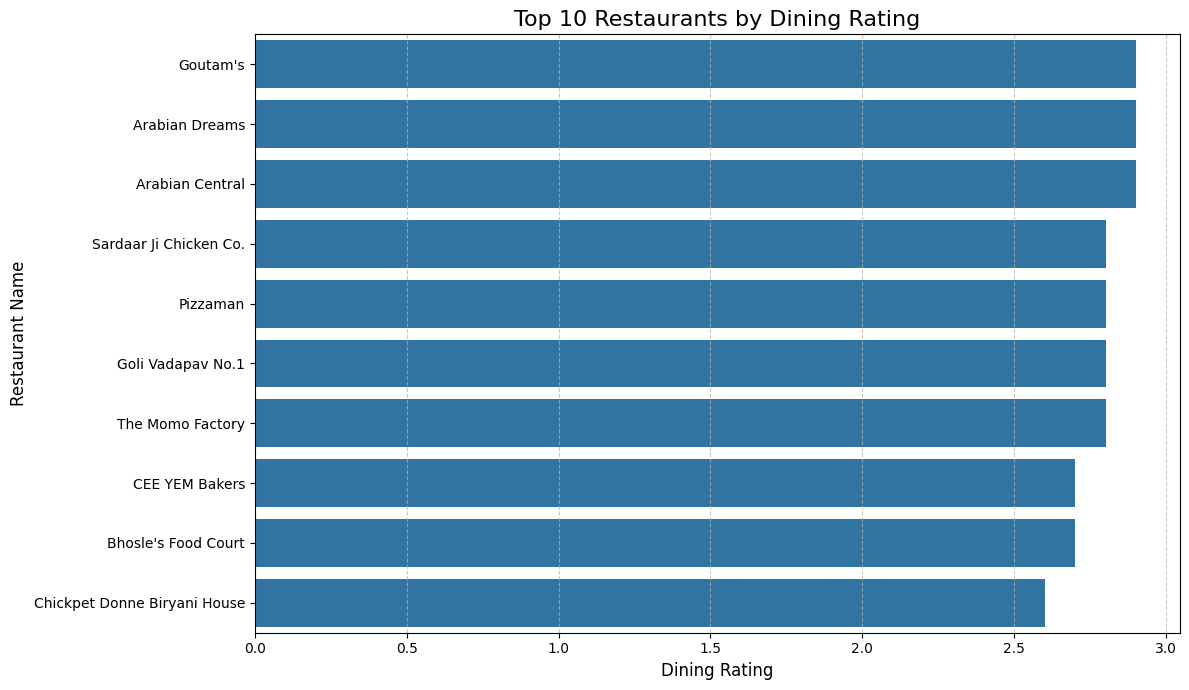

In [100]:
least_10_restaurants =  res_df.nsmallest(10, 'DiningRating')

#Visualization: Bar Chart
plt.figure(figsize=(12, 7)) # Adjust figure size for better readability
sns.barplot(x='DiningRating', y='RestaurantName', data=least_10_restaurants)
plt.title('Top 10 Restaurants by Dining Rating', fontsize=16)
plt.xlabel('Dining Rating', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rating at the top
plt.grid(axis='x', linestyle='--', alpha=0.7) # Add grid lines for easier comparison
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


###**Observations:-**
- The bar chart provides a visual representation of the bottom 10 restaurants by dining rating.
- Chickpet Donne Biryani House restaurant has one of the lowest dining rating in the whole country.


###**3. Top 10 expensive places to dine in?**

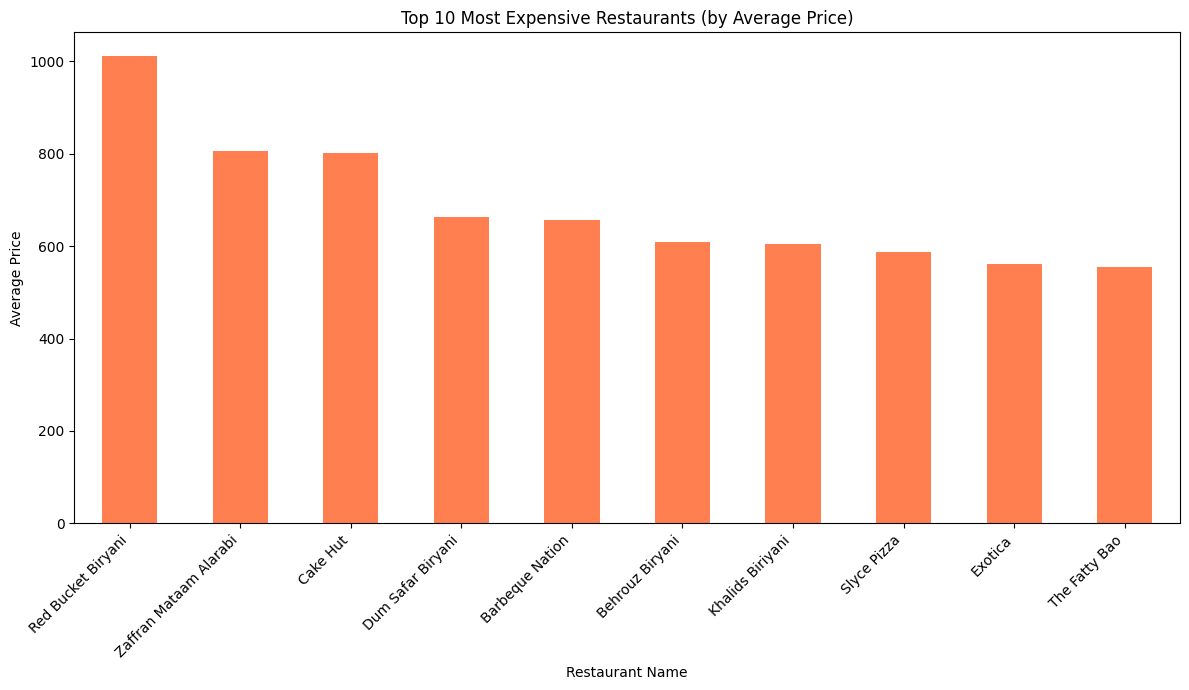

In [101]:
# Calculate the average price for each restaurant
average_prices = df.groupby('RestaurantName')['Prices'].mean()

# Sort by average price in descending order and select the top 10
top_10_expensive = average_prices.sort_values(ascending=False).head(10)


# Create the bar plot
plt.figure(figsize=(12, 7))
top_10_expensive.plot(kind='bar', color='coral')
plt.title('Top 10 Most Expensive Restaurants (by Average Price)')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###**Observations:-**
- The bar chart provides a visual representation of the top 10 restaurants by avg price.
- Red Bucket Biryani restaurant is one among the most expensive restaurant in the whole country.

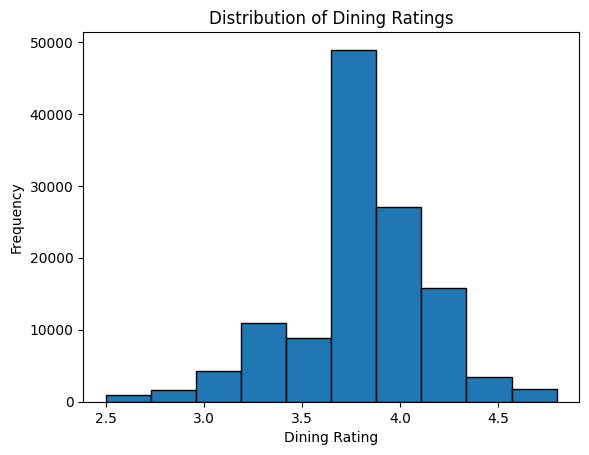

In [103]:
df['DiningRating'].value_counts()
plt.hist(df['DiningRating'],bins=10,edgecolor='black')
plt.xlabel('Dining Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Dining Ratings')
plt.show()


###**4.Which restaurants have the highest combined dining and delivery ratings?**

In [108]:
# Calculate combined rating as a simple average
df['CombinedRating'] = (df['DiningRating'] + df['DeliveryRating']) / 2


In [109]:
df.shape

(123657, 13)

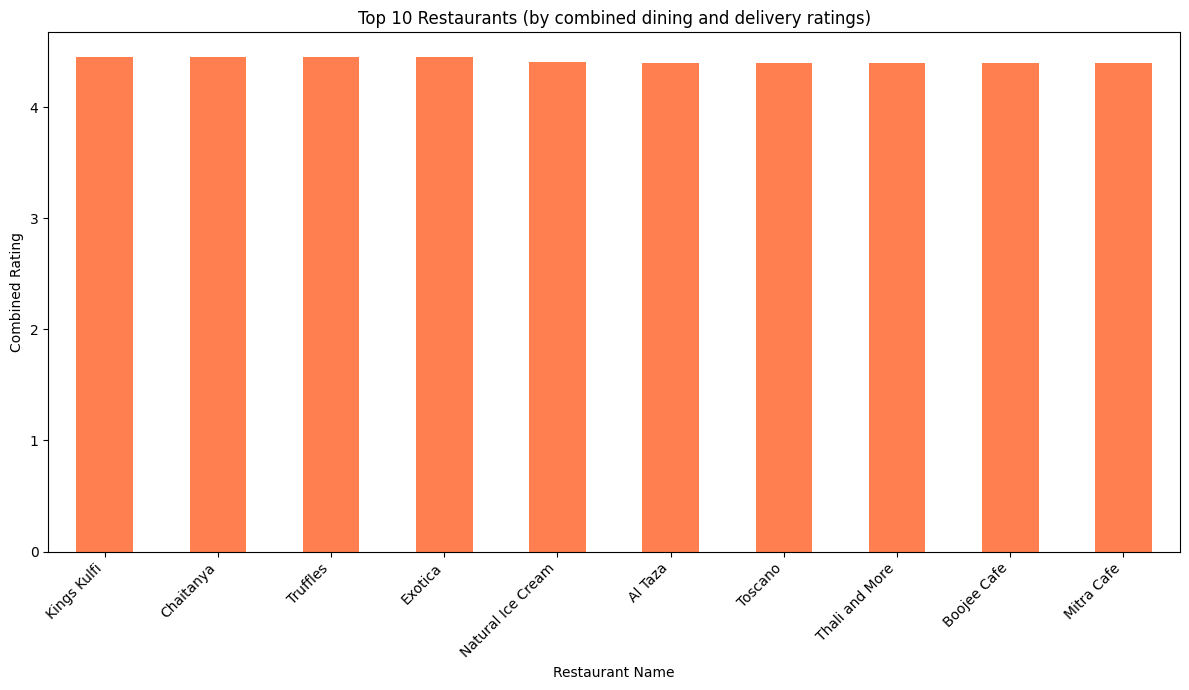

In [110]:
# Calculate the average combined rating for each restaurant
average_combinedrating = df.groupby('RestaurantName')['CombinedRating'].mean()


#top 10 restaurants that have the highest combined dining and delivery ratings.
top_10_combined_rating = average_combinedrating.sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 7))
top_10_combined_rating.plot(kind='bar', color='coral')
plt.title('Top 10 Restaurants (by combined dining and delivery ratings)')
plt.xlabel('Restaurant Name')
plt.ylabel('Combined Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###**Observations:-**
- The bar chart provides a visual representation of the top 10 restaurants by combined rating of both dining and delivery rating.

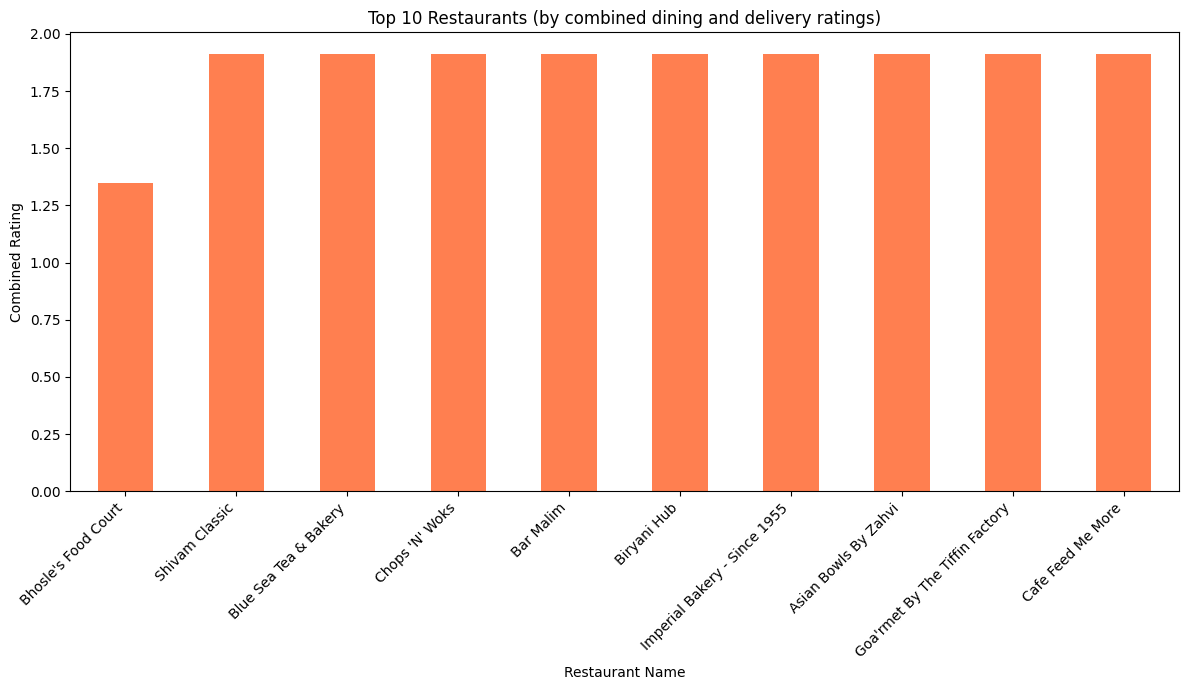

In [111]:
#bottom 10 restaurants that have the least combined dining and delivery ratings.
bottom_10_combined_rating = average_combinedrating.sort_values(ascending=True).head(10)

# Create the bar plot
plt.figure(figsize=(12, 7))
bottom_10_combined_rating.plot(kind='bar', color='coral')
plt.title('Top 10 Restaurants (by combined dining and delivery ratings)')
plt.xlabel('Restaurant Name')
plt.ylabel('Combined Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###**Observations:-**
- The bar chart provides a visual representation of the bottom 10 restaurants by combined rating of both dining and delivery rating.
- Bhosle's Food Court restaurant is one among the bottom restaurant in the whole country when combined of both dining and delivery rating.
- Resturants can use this data to improve their dining and delivery system.

###**5. Top 10 restaurants based on best selling items?**


In [113]:
df[df['BestSeller']=='BESTSELLER']

# Calculate the average combined rating for each restaurant
average_combinedrating = df.groupby('RestaurantName')['CombinedRating'].mean()

#top 10 restaurants that have the highest combined dining and delivery ratings.
top_10_combined_rating = average_combinedrating.sort_values(ascending=False).head(10)

In [114]:
# Filter for rows where 'Best Seller' is True
best_sellers_df = df[df['BestSeller'] == 'BESTSELLER']

# Group by Restaurant Name and list the Item Name for best sellers
top_sellers_per_restaurant = best_sellers_df.groupby('RestaurantName')['ItemName'].apply(list)

#top 10 restaurants  based on best selling item
top_10_sellers_per_restaurant = top_sellers_per_restaurant.sort_values(ascending=False).head(10)


In [115]:
print("Specific Best Seller Menu Items per Restaurant:")
print(top_10_sellers_per_restaurant)


Specific Best Seller Menu Items per Restaurant:
RestaurantName
Prithvi Hotel            [chicken Thali 1, Paneer Butter Masala, Veg Du...
Potoba                   [Zunka Bhakri 2pc, Puri Bhaji, Misal Thali, Po...
Food Track               [Zinger Chicken Wrap, Fried Chicken Wings, Mar...
Cream Stone Ice Cream    [Willy Wonka Ice Cream, Nuts Overloaded Ice Cr...
Gokul Refreshment        [Whole wheat laccha paratha [2] + Dal makhani ...
Sandwich Junction        [White Sauce Pasta, Corn Cheese Sandwich, Mexi...
Bell Pepper Pizza        [White Sauce Pasta, Aloo Tikki Burger, Fresh V...
Mayur Pan House          [Watermelon Juice, Regular Pav Bhaji, Vada Pav...
Pizza Wala               [Veggie Pizza, BBQ Chicken Pizza, Peri Peri Pa...
Jay Bhavani Vadapav      [Vegetable Cheese Grilled Sandwich, Aloo Matar...
Name: ItemName, dtype: object


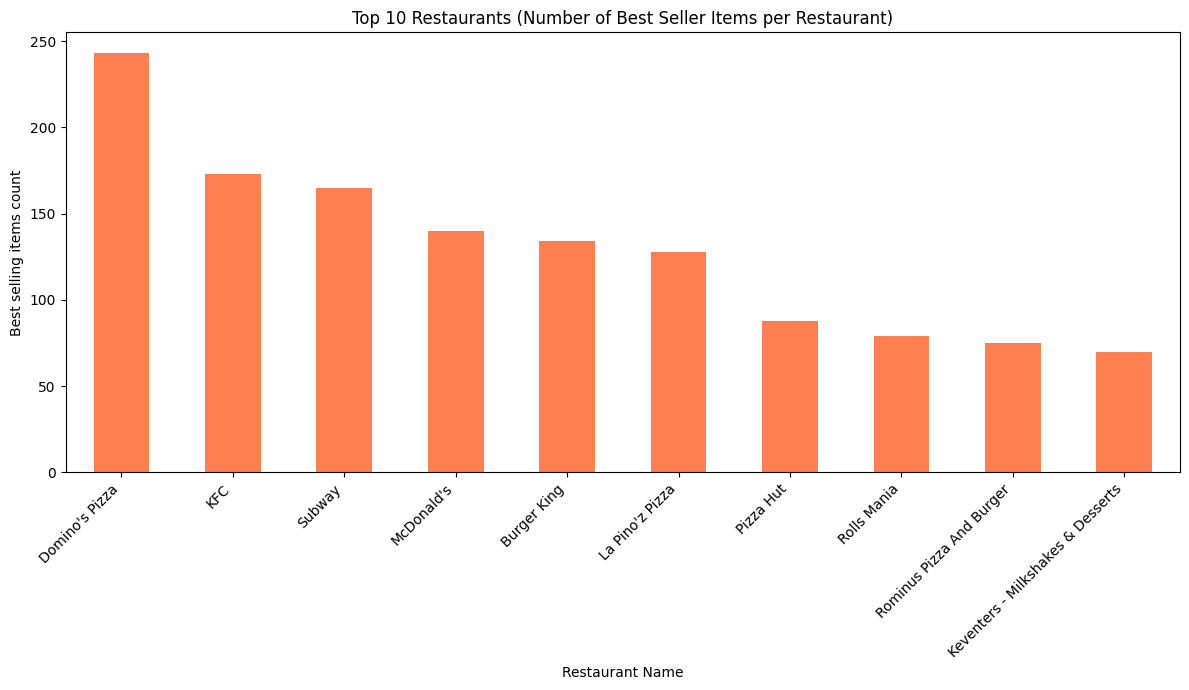

In [150]:
#count of best sellers per restaurant:
best_seller_counts = best_sellers_df.groupby('RestaurantName')['ItemName'].count().sort_values(ascending=False).head(10)
#print("\nNumber of Best Seller Items per Restaurant:")
#print(best_seller_counts)

#bar plot
plt.figure(figsize=(12, 7))
best_seller_counts.plot(kind='bar', color='coral')
plt.title('Top 10 Restaurants (Number of Best Seller Items per Restaurant)')
plt.xlabel('Restaurant Name')
plt.ylabel('Best selling items count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###**Observations:-**
- The bar chart provides a visual representation of the top 10 restaurants that have highest number of best selling items in their list.
- Domino's Pizza restaurant leads in the most number of best selling items in their menu whole country.
- New/Other Resturants can understand and include these food items in their menu.

###**6. Cities with maximum restaurants**


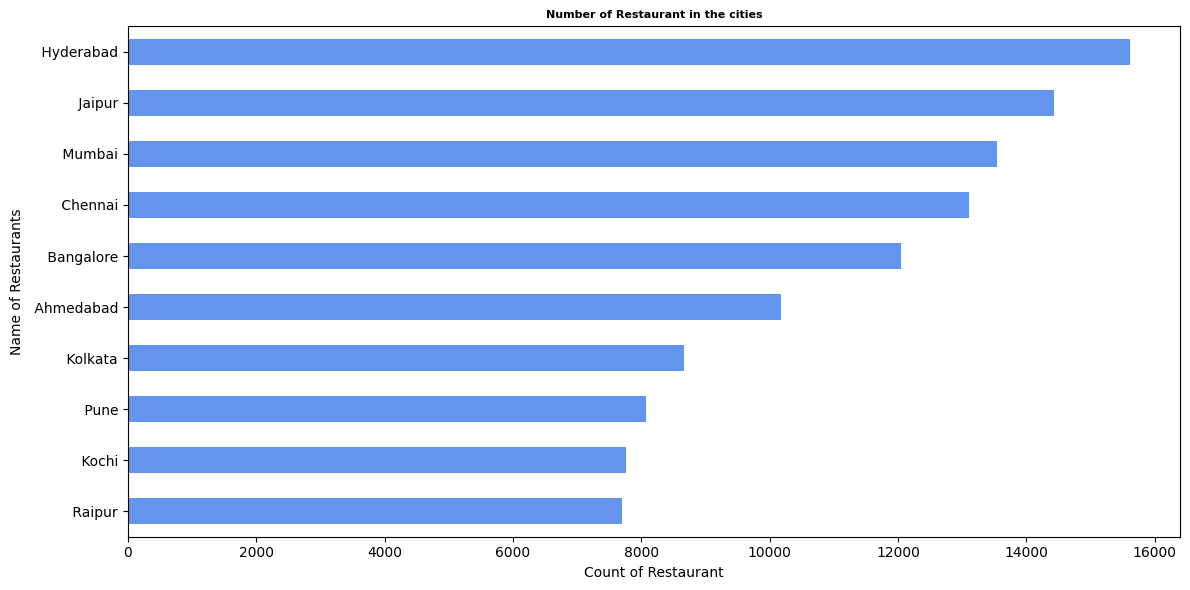

In [117]:
max_restaurants_city = df['City'].value_counts().nlargest(10).sort_values(ascending= False)
plt.figure(figsize = (12,6))
ax = max_restaurants_city.plot(kind = 'barh', color = '#6495ED')
plt.xlabel("Count of Restaurant")
plt.ylabel("Name of Restaurants")
plt.title("Number of Restaurant in the cities",fontsize =8, weight = 'bold')
ax.invert_yaxis()
plt.tight_layout()

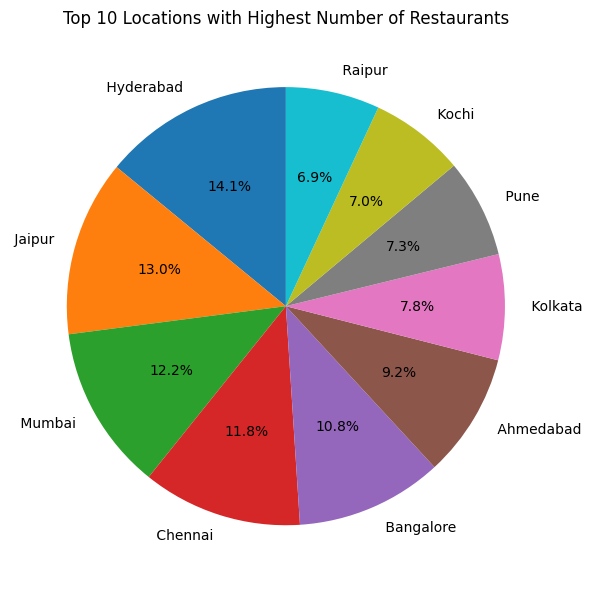

In [118]:
location_counts = df['City'].value_counts().head(10)
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Top 10 Locations with Highest Number of Restaurants', fontsize=12)

plt.tight_layout()

# Show plot
plt.show()

###**Observations:-**
- The bar chart provides a visual representation of the top 10 locations with highest number of restaurants.
- Hyderabad has around 14% restaurants, which is one of the top locations with highest number of restaurants.
- New resturants can look at this data and make a decision on where to setup their resturant.
- Older resturant who are looking to expand their business can also leverage this data for their advantage.

###**7. Popular dishes in india?**

In [119]:
#popular dishes in india
df.groupby('ItemName')['City'].count().sort_values(ascending=False).head(10)

ItemName
Veg Fried Rice          322
Paneer Butter Masala    319
Chicken Fried Rice      278
Jeera Rice              231
Chicken Biryani         226
French Fries            211
Butter Naan             198
Egg Fried Rice          197
Veg Biryani             188
Chicken 65              181
Name: City, dtype: int64

###**Observations:-**
- The List provides us of the top 10 dishes in the country.
- Veg Fried Rice and Panner Butter Masala are the most popular choice among the customers.
- Resturants can look at this data and offer special discounts on these popular to increase more sales.

###**8. Which cuisines is most popular in each city?**


In [120]:
df['City'].nunique()

17

In [121]:
# Group by City and then by Cuisine, then count the occurrences
cuisine_counts_by_city = df.groupby(['City', 'Cuisine']).size().reset_index(name='Count')

# Find the most popular cuisine for each city
most_popular_cuisine_per_city = cuisine_counts_by_city.loc[
    cuisine_counts_by_city.groupby('City')['Count'].idxmax()
]

print("Most Popular Cuisine in Each City:")
print(most_popular_cuisine_per_city)

Most Popular Cuisine in Each City:
              City     Cuisine  Count
1        Ahmedabad   Beverages   3547
19       Banaswadi   Fast Food     97
24       Bangalore   Beverages   3495
46         Chennai   Beverages   5278
65             Goa   Beverages    592
81       Hyderabad   Beverages   5391
104         Jaipur   Beverages   6337
122          Kochi   Beverages   2297
147        Kolkata       Pizza   6167
152        Lucknow   Beverages   1266
168   Magrath Road    Desserts     54
169   Malleshwaram  Rajasthani     43
171         Mumbai   Beverages   5455
191      New Delhi   Beverages    960
201           Pune   Beverages   3905
214         Raipur       Pizza   7700
215         Ulsoor    Desserts     66


###**Observations:-**
- The List is of the most popular cuisine in each city.
- Beverages are most preferred cuisine choice in most of the cities.
- New resturants can look at this data of preferred cuisine in each city and make a decision on their resturants cuisine choice.
- Older resturants can use this data for their advantage by introducing fresh changes to their menu based on the preferred cuisine choice by customers based on their respective cities.

###**9. Which individual dishes most popular in each city?**

In [122]:
df.head()

RestaurantName  DiningRating  DeliveryRating  DiningVotes  DeliveryVotes  \
0     Doner King           3.9             4.2           39              0   
1     Doner King           3.9             4.2           39              0   
2     Doner King           3.9             4.2           39              0   
3     Doner King           3.9             4.2           39              0   
4     Doner King           3.9             4.2           39              0   

     Cuisine PlaceName        City                  ItemName  BestSeller  \
0  Fast Food  Malakpet   Hyderabad       Platter Kebab Combo  BESTSELLER   
1  Fast Food  Malakpet   Hyderabad   Chicken Rumali Shawarma  BESTSELLER   
2  Fast Food  Malakpet   Hyderabad    Chicken Tandoori Salad     Regular   
3  Fast Food  Malakpet   Hyderabad         Chicken BBQ Salad  BESTSELLER   
4  Fast Food  Malakpet   Hyderabad  Special Doner Wrap Combo    MUST TRY   

   Votes  Prices  CombinedRating  
0     84   249.0            4.05  
1     45   129.0            4.05  
2     39   189.0            4.05  
3     43   189.0            4.05  
4     31   205.0            4.05

In [123]:
df.groupby(['City', 'ItemName'])['Votes'].sum().reset_index()

City                                 ItemName  Votes
0       Ahmedabad  (Sweet) Paneer Shahi Cream [350-400 Gm]     11
1       Ahmedabad                         1 Achari Paratha      0
2       Ahmedabad                     1 All in One Paratha      0
3       Ahmedabad                 1 Aloo Corn Pyaz Paratha      0
4       Ahmedabad                      1 Aloo Gobi Paratha      0
...           ...                                      ...    ...
75178      Ulsoor      Paneer Tikka Dum Biryani (Serves 2)      0
75179      Ulsoor      Paneer Tikka Dum Biryani (Serves 4)      0
75180      Ulsoor                         Strawberry Shake      0
75181      Ulsoor                    Tandoori Paneer Tikka      0
75182      Ulsoor                          Veg Shami Kebab      0

[75183 rows x 3 columns]

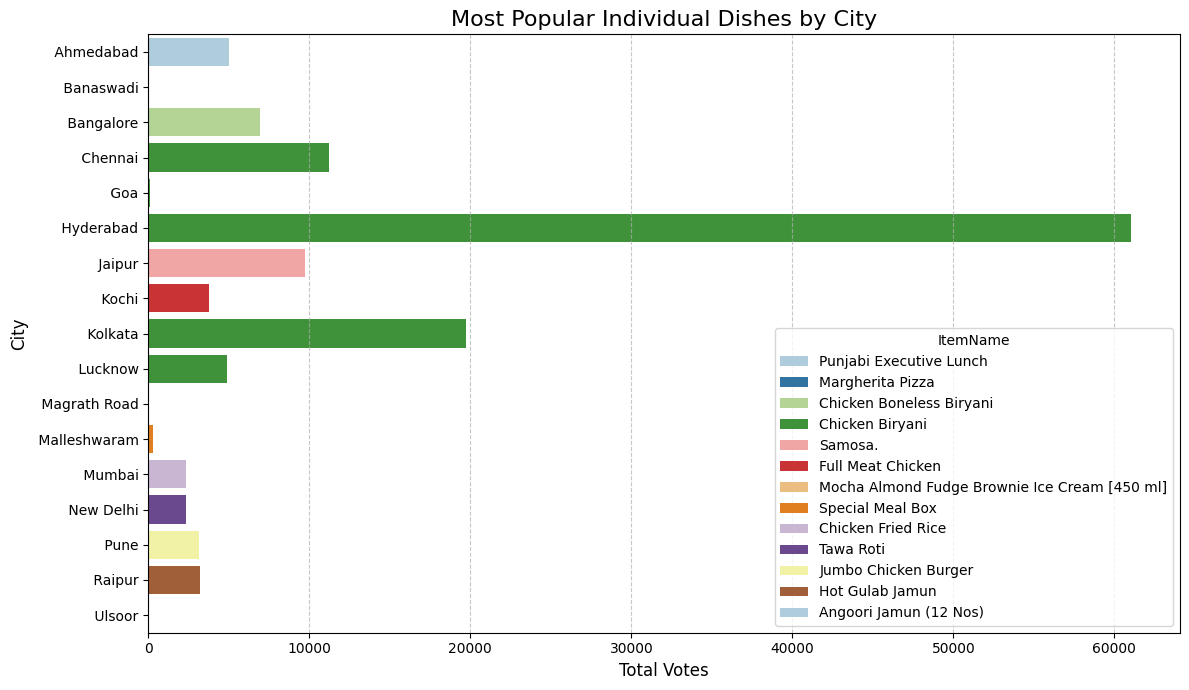

In [151]:
city_dish_popularity = df.groupby(['City', 'ItemName'])['Votes'].sum().reset_index()

# Find the most popular dish (highest votes) within each city
most_popular_dishes_per_city = city_dish_popularity.loc[
    city_dish_popularity.groupby('City')['Votes'].idxmax()
]

#print("Most Popular Dish in Each City:")
#print(most_popular_dishes_per_city)

#Visualization: Bar Chart for Most Popular Dish per City
plt.figure(figsize=(12, 7))
sns.barplot(x='Votes', y='City', hue='ItemName', data=most_popular_dishes_per_city, palette='Paired', dodge=False)
plt.title('Most Popular Individual Dishes by City', fontsize=16)
plt.xlabel('Total Votes', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


###**Observations:-**
- The List is of the most popular dish in each city.
- Chicken Biryani is highly rated food in places like hyderabad, chennai, kolkata, lucknow.

###**10. Most expensive Cuisine by city?**

In [125]:
# Most expensive Cuisine by city
df_city = df.groupby(['City','Cuisine'], as_index= False)['Prices'].max()
idx = df_city.groupby('City')['Prices'].idxmax()
df_city_max_price = df_city.loc[idx]
df_city_max_price = df_city_max_price.set_index('City')
df_city_max_price

Cuisine    Prices
City                              
Ahmedabad          Shake   2599.00
Banaswadi      Fast Food   1250.00
Bangalore          Kebab   3999.00
Chennai          Chinese   6500.00
Goa              Biryani   2300.00
Hyderabad        Biryani   3250.00
Jaipur         Beverages   3000.00
Kochi          Beverages   2749.00
Kolkata          Seafood  12024.00
Lucknow           Bakery   5593.22
Magrath Road    Desserts    864.79
Malleshwaram  Rajasthani    325.00
Mumbai          Desserts   3800.00
New Delhi      Beverages   2069.00
Pune           Fast Food   2560.00
Raipur             Pizza   3999.00
Ulsoor          Desserts   1999.00

###**Observations:-**
- The List gives most expensive cuisine by city.
- In Kolkata seafood is the most expensive cuisine in the whole country.

###**11. Are there differences in ratings and customer satisfaction for dining versus delivery services?**


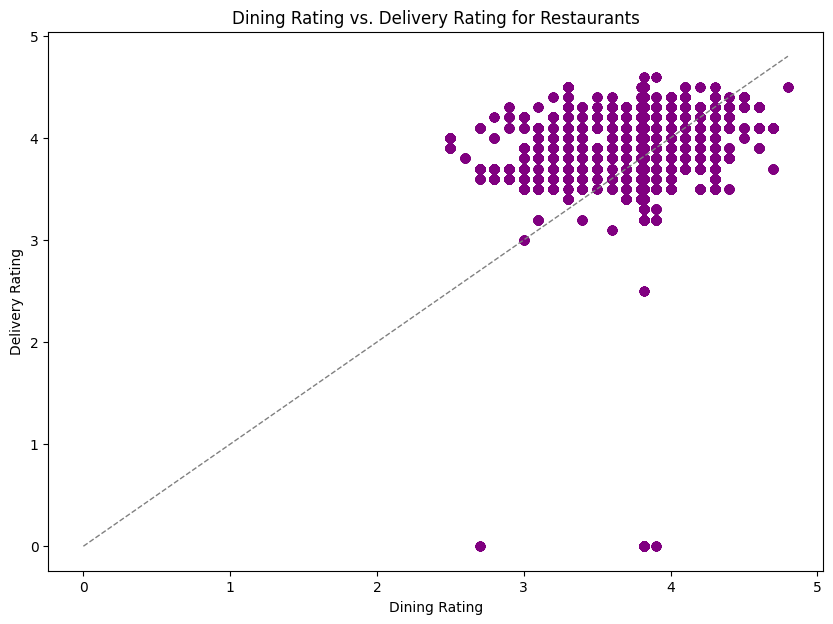

In [127]:
# Create the scatter plot
plt.figure(figsize=(10, 7)) # Adjust figure size for better readability
plt.scatter(df['DiningRating'], df['DeliveryRating'], alpha=0.7, color='purple')

# Add labels and title
plt.title('Dining Rating vs. Delivery Rating for Restaurants')
plt.xlabel('Dining Rating')
plt.ylabel('Delivery Rating')

# Add a diagonal line (y=x) for easy comparison
# This line helps visualize restaurants that have similar ratings for both services
min_rating = min(df['DiningRating'].min(), df['DeliveryRating'].min())
max_rating = max(df['DiningRating'].max(), df['DeliveryRating'].max())
plt.plot([min_rating, max_rating], [min_rating, max_rating], color='gray', linestyle='--', linewidth=1, label='Equal Ratings Line')

plt.show()

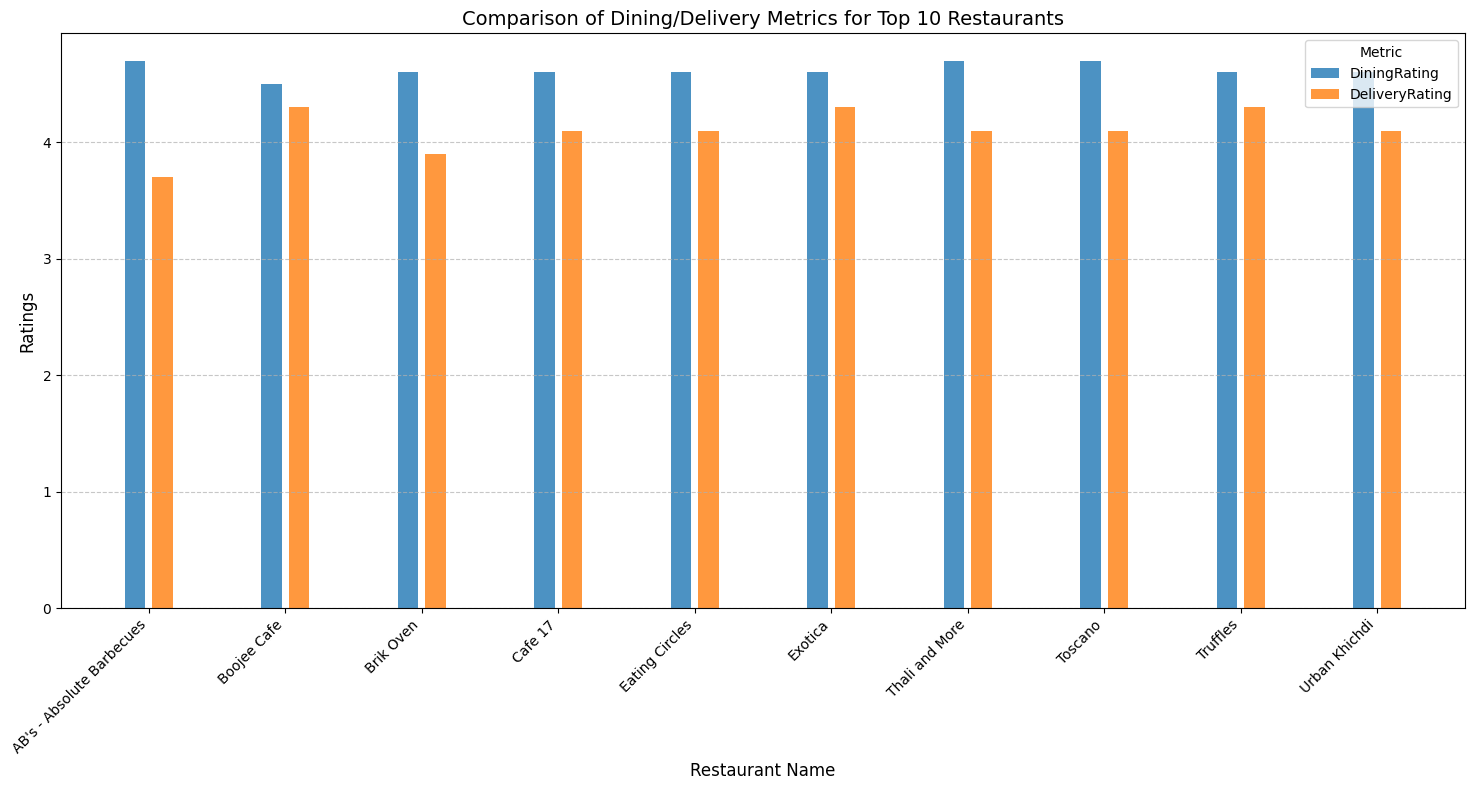

In [128]:
#Comparison of Dining/Delivery Metrics for Top 10 Restaurants

# Get the names of the top 10 restaurants
top_10_restaurant_names = top_10_restaurants['RestaurantName']

# Filter the original DataFrame for the top 10 restaurants
top_10_df = df[df['RestaurantName'].isin(top_10_restaurant_names)]

# Group by restaurant and calculate the mean of the metrics
plot_data = top_10_df.groupby('RestaurantName')[['DiningRating', 'DeliveryRating']].mean()


# Select the metrics to plot
metrics_to_plot = ['DiningRating', 'DeliveryRating']

# Create the Grouped Bar Chart
n_restaurants = len(plot_data)
n_metrics = len(metrics_to_plot)
bar_width = 0.15
spacing = 0.05
r = np.arange(n_restaurants)

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics_to_plot):
    bar_positions = r + (i - (n_metrics - 1) / 2) * (bar_width + spacing)
    plt.bar(bar_positions, plot_data[metric], width=bar_width, label=metric.replace(' (Scaled)', ''), alpha=0.8)

plt.xlabel('Restaurant Name', fontsize=12)
plt.ylabel(f'Ratings', fontsize=12)
plt.title(f'Comparison of Dining/Delivery Metrics for Top {len(top_10_restaurant_names)} Restaurants', fontsize=14)
plt.xticks(r, plot_data.index, rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Metric', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

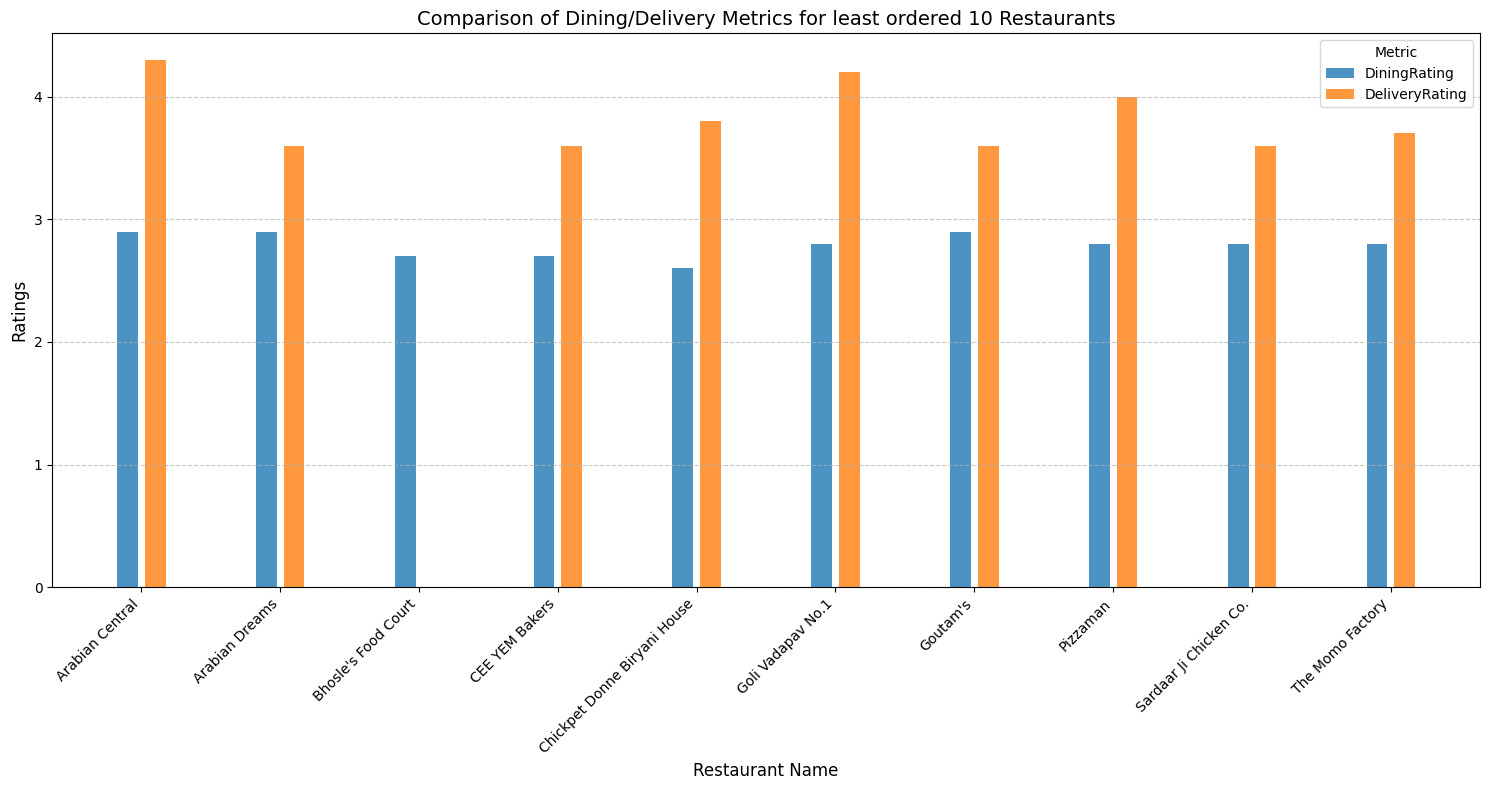

In [155]:
#Comparison of Dining/Delivery Metrics for bottom 10 Restaurants

# Get the names of the least 10 restaurants
least_10_restaurant_names = least_10_restaurants['RestaurantName']

# Filter the original DataFrame for the least 10 restaurants
least_10_df = df[df['RestaurantName'].isin(least_10_restaurant_names)]

# Group by restaurant and calculate the mean of the metrics
plot_data = least_10_df.groupby('RestaurantName')[['DiningRating', 'DeliveryRating']].mean()


# Select the metrics to plot
metrics_to_plot = ['DiningRating', 'DeliveryRating']

# Create the Grouped Bar Chart
n_restaurants = len(plot_data)
n_metrics = len(metrics_to_plot)
bar_width = 0.15
spacing = 0.05
r = np.arange(n_restaurants)

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics_to_plot):
    bar_positions = r + (i - (n_metrics - 1) / 2) * (bar_width + spacing)
    plt.bar(bar_positions, plot_data[metric], width=bar_width, label=metric.replace(' (Scaled)', ''), alpha=0.8)

plt.xlabel('Restaurant Name', fontsize=12)
plt.ylabel(f'Ratings', fontsize=12)
plt.title(f'Comparison of Dining/Delivery Metrics for least ordered {len(least_10_restaurant_names)} Restaurants', fontsize=14)
plt.xticks(r, plot_data.index, rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Metric', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

###**Observations:-**
- The bar chart provides a visual representation of the top 10 locations with highest number of restaurants.
- Looking at dining/delivery metrics of top 10 restaurants and bottom 10 restaurants, there is very weak or no correlation between 2 metrics.
- But except one or two in top restaurants all have good ratings(around 4) on both dining and delivery.
- Whereas bottom restaurants all have less than 3 ratings for dining and delivery rating of many are also low(around 3.5) except few restaurants which have only good ratings for delivery.

###**12. How does menu diversity or complexity impact customer satisfaction?**


In [156]:
df['RestaurantName'].nunique()

826

In [130]:
# Calculate Menu Diversity (Number of Unique Items)
# Group by restaurant and count unique item names
menu_diversity_items = df.groupby('RestaurantName')['ItemName'].nunique().reset_index(name='Num_Unique_Items')
print("Menu Diversity (Number of Unique Items per Restaurant):\n", menu_diversity_items)

Menu Diversity (Number of Unique Items per Restaurant):
                RestaurantName  Num_Unique_Items
0                12 To 12 BBQ               127
1               1441 Pizzeria               105
2     1944 -The HOCCO Kitchen               192
3            4M Biryani House                98
4                    7 Plates               146
..                        ...               ...
821    Zaffran Mataam Alarabi                18
822           Zam Zam Briyani                84
823        Zam Zam Restaurant                72
824    Zeeshan Biryani Corner                24
825  Zomoz - The Momo Company                65

[826 rows x 2 columns]


In [131]:
# Calculate Menu Diversity (Number of Unique Cuisines)
menu_diversity_cuisines = df.groupby('RestaurantName')['Cuisine'].nunique().reset_index(name='Num_Unique_Cuisines')
print("\nMenu Diversity (Number of Unique Cuisines per Restaurant):\n", menu_diversity_cuisines)



Menu Diversity (Number of Unique Cuisines per Restaurant):
                RestaurantName  Num_Unique_Cuisines
0                12 To 12 BBQ                    1
1               1441 Pizzeria                    1
2     1944 -The HOCCO Kitchen                    1
3            4M Biryani House                    1
4                    7 Plates                    1
..                        ...                  ...
821    Zaffran Mataam Alarabi                    1
822           Zam Zam Briyani                    1
823        Zam Zam Restaurant                    1
824    Zeeshan Biryani Corner                    1
825  Zomoz - The Momo Company                    1

[826 rows x 2 columns]


In [132]:
# Merge these metrics back into the main DataFrame (or a new aggregated one)
restaurant_metrics = df.groupby('RestaurantName').agg(
    Avg_Dining_Rating=('DiningRating', 'mean'),
    Avg_Delivery_Rating=('DeliveryRating', 'mean')
).reset_index()

restaurant_metrics = pd.merge(restaurant_metrics, menu_diversity_items, on='RestaurantName', how='left')
restaurant_metrics = pd.merge(restaurant_metrics, menu_diversity_cuisines, on='RestaurantName', how='left')

print("\nRestaurant Metrics with Diversity Scores:\n", restaurant_metrics)



Restaurant Metrics with Diversity Scores:
                RestaurantName  Avg_Dining_Rating  Avg_Delivery_Rating  \
0                12 To 12 BBQ           4.000000                  4.0   
1               1441 Pizzeria           3.822264                  4.0   
2     1944 -The HOCCO Kitchen           4.300000                  4.3   
3            4M Biryani House           4.100000                  4.2   
4                    7 Plates           3.822264                  4.3   
..                        ...                ...                  ...   
821    Zaffran Mataam Alarabi           4.100000                  4.1   
822           Zam Zam Briyani           3.300000                  3.4   
823        Zam Zam Restaurant           4.200000                  4.3   
824    Zeeshan Biryani Corner           3.700000                  4.0   
825  Zomoz - The Momo Company           3.822264                  4.3   

     Num_Unique_Items  Num_Unique_Cuisines  
0                 127             

In [133]:
# Calculate correlation between diversity metrics and ratings
correlation_items_dining = restaurant_metrics['Num_Unique_Items'].corr(restaurant_metrics['Avg_Dining_Rating'])
correlation_items_delivery = restaurant_metrics['Num_Unique_Items'].corr(restaurant_metrics['Avg_Delivery_Rating'])

correlation_cuisines_dining = restaurant_metrics['Num_Unique_Cuisines'].corr(restaurant_metrics['Avg_Dining_Rating'])
correlation_cuisines_delivery = restaurant_metrics['Num_Unique_Cuisines'].corr(restaurant_metrics['Avg_Delivery_Rating'])

print(f"\nCorrelation between Num_Unique_Items and Avg_Dining_Rating: {correlation_items_dining:.2f}")
print(f"Correlation between Num_Unique_Items and Avg_Delivery_Rating: {correlation_items_delivery:.2f}")
print(f"Correlation between Num_Unique_Cuisines and Avg_Dining_Rating: {correlation_cuisines_dining:.2f}")
print(f"Correlation between Num_Unique_Cuisines and Avg_Delivery_Rating: {correlation_cuisines_delivery:.2f}")



Correlation between Num_Unique_Items and Avg_Dining_Rating: 0.09
Correlation between Num_Unique_Items and Avg_Delivery_Rating: 0.11
Correlation between Num_Unique_Cuisines and Avg_Dining_Rating: -0.00
Correlation between Num_Unique_Cuisines and Avg_Delivery_Rating: 0.02


In [134]:
plt.figure(figsize=(12, 5))

# Scatter plot for Number of Unique Items vs Dining Rating
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(x='Num_Unique_Items', y='Avg_Dining_Rating', data=restaurant_metrics, s=100)
plt.title('Menu Diversity (Items) vs. Avg Dining Rating')
plt.xlabel('Number of Unique Items')
plt.ylabel('Average Dining Rating')
plt.grid(True, linestyle='--', alpha=0.6)

# Scatter plot for Number of Unique Cuisines vs Delivery Rating
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.scatterplot(x='Num_Unique_Cuisines', y='Avg_Dining_Rating', data=restaurant_metrics, s=100)
plt.title('Menu Diversity (Cuisines) vs. Avg Delivery Rating')
plt.xlabel('Number of Unique Cuisines')
plt.ylabel('Average Dining Rating')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [135]:
df.shape

(123657, 13)

###**Observations:-**

- Found that a correlation of around 0.1 between Menu Diversity (Number of Unique Items) and Avg_Dining_Rating, it would suggest that there is a very slight tendency for restaurants with more unique items to have higher dining ratings, but this relationship is not strong and can be ignored too in most case.

- Correlation between number of unique cuisines and avg dining rating is around 0, practically indicating no linear relationship. There is almost no noticeable linear trend between the number of unique cuisines and the average delivery rating.

###**13. Which restaurants demonstrate better efficiency in handling both dine-in and delivery operations?**

In [136]:
#Aggregate data to one row per unique Restaurant Name ---
# The 'mean' is used for ratings assuming the rating given is for the restaurant overall
# and 'sum' for votes to get the total votes per restaurant.
restaurant_level_df = df.groupby('RestaurantName').agg(
    Dining_Rating=('DiningRating', 'mean'),
    Delivery_Rating=('DeliveryRating', 'mean'),
    Dining_Votes=('DiningVotes', 'sum'),
    Delivery_Votes=('DeliveryVotes', 'sum')
).reset_index()

In [157]:
df.shape

(123657, 13)

In [138]:

scaling_factor_votes = 500 # Adjust if your votes are typically much higher or lower

restaurant_level_df['Scaled_Dining_Votes'] = restaurant_level_df['Dining_Votes'] / scaling_factor_votes
restaurant_level_df['Scaled_Delivery_Votes'] = restaurant_level_df['Delivery_Votes'] / scaling_factor_votes

# Calculate Efficiency Score: Higher values indicate better balanced performance
# The scaled votes are used to prevent large vote counts from completely overpowering the ratings.
restaurant_level_df['Efficiency_Score'] = (restaurant_level_df['Dining_Rating'] * restaurant_level_df['Scaled_Dining_Votes']) + \
                                        (restaurant_level_df['Delivery_Rating'] * restaurant_level_df['Scaled_Delivery_Votes'])

# --- 5. Identify the Top 10 Restaurants based on Efficiency Score ---
top_10_efficient_restaurants = restaurant_level_df.sort_values(by='Efficiency_Score', ascending=False).head(10)


In [139]:
df.shape

(123657, 13)

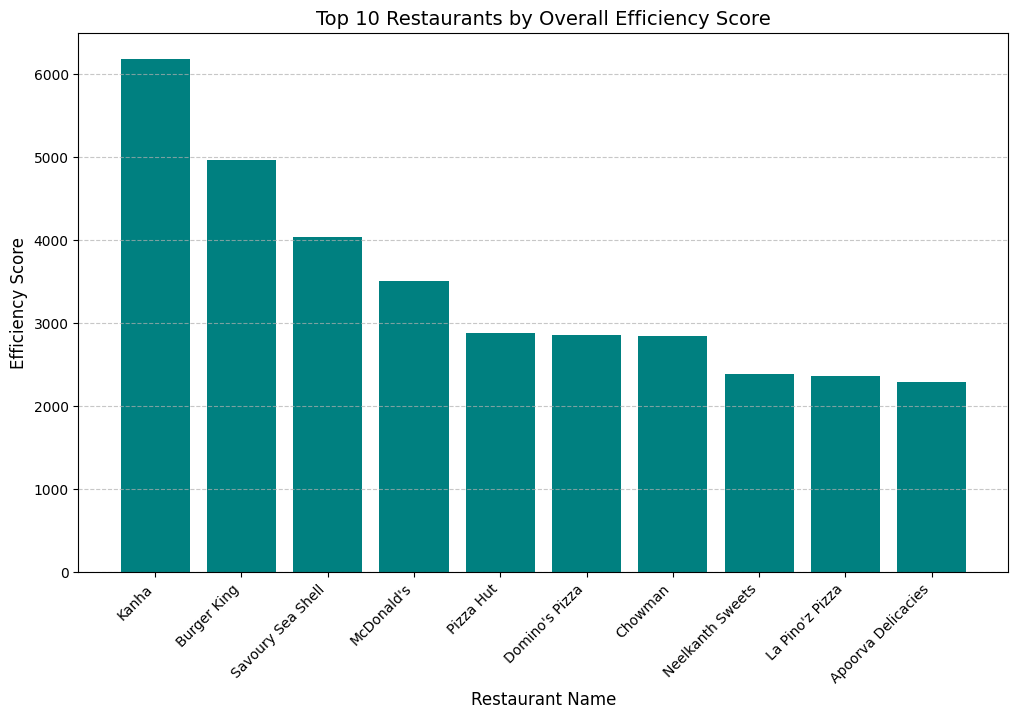

In [140]:
# --- Create the Bar Chart for Efficiency Scores ---
plt.figure(figsize=(12, 7)) # Adjust figure size

# Create the bar plot using the 'Efficiency_Score'
plt.bar(top_10_efficient_restaurants['RestaurantName'], top_10_efficient_restaurants['Efficiency_Score'], color='teal')

# Customize the plot
plt.xlabel('Restaurant Name', fontsize=12)
plt.ylabel('Efficiency Score', fontsize=12)
plt.title('Top 10 Restaurants by Overall Efficiency Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for readability
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


###**Observations:-**
- The bar chart provides a visual representation of the top 10 resturants that handles best dine-n and delivery efficiency.
- Kanh resturant followed by Burger King are the 2 resturants which handles dine-n and delivery efficiency the best.

###**14. Is good Delivery Rating leads to good Dining Rating or vice-versa?**

In [141]:
# --- Visualization: Scatter Plot with Regression Line ---
plt.figure(figsize=(10, 6))
sns.regplot(x='DiningRating', y='DeliveryRating', data=df, scatter_kws={'alpha':0.6})
plt.title('Relationship between Dining Rating and Delivery Rating')
plt.xlabel('Dining Rating')
plt.ylabel('Delivery Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [142]:
# --- Calculate and Display Correlation Coefficient ---
correlation = df['DiningRating'].corr(df['DeliveryRating'])
print(f"\nPearson correlation coefficient between Dining Rating and Delivery Rating: {correlation:.2f}")


Pearson correlation coefficient between Dining Rating and Delivery Rating: 0.14


In [143]:
# Calculate pairwise correlations between columns
df_num= df[['DiningRating', 'DeliveryRating', 'DiningVotes', 'DeliveryVotes', 'Prices']]
corr = df_num.corr()

# Display the correlation between columns
corr

DiningRating  DeliveryRating  DiningVotes  DeliveryVotes  \
DiningRating        1.000000        0.139865     0.211315      -0.108812   
DeliveryRating      0.139865        1.000000     0.125771       0.006632   
DiningVotes         0.211315        0.125771     1.000000      -0.244525   
DeliveryVotes      -0.108812        0.006632    -0.244525       1.000000   
Prices              0.061798        0.035594     0.016136       0.007060   

                  Prices  
DiningRating    0.061798  
DeliveryRating  0.035594  
DiningVotes     0.016136  
DeliveryVotes   0.007060  
Prices          1.000000

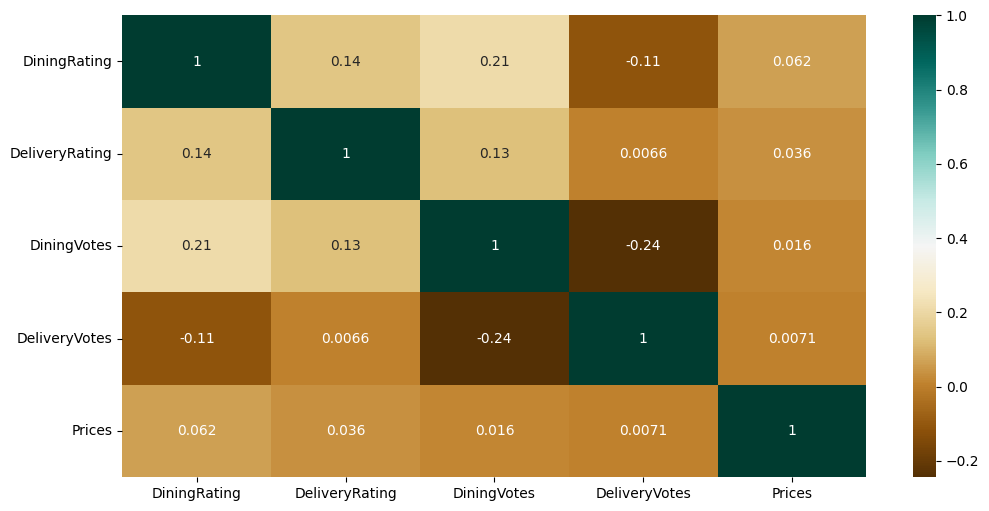

In [144]:
# Set the figure size
plt.figure(figsize=(12,6))

# Visualize correlations as a heatmap
sns.heatmap(corr, cmap='BrBG',annot=True)

# Display heatmap
plt.show()

###**Observations:-**
- The heatmap shows correlation among numerical columns.
- There is a weak or no linear correlation(0.14) between dining rating and delivery ratings.
- There is no linear correlation(0.062) between dining rating and prices.
- So, no conclusive evidence to show that good delivery rating leads to good dining rating or vice-versa.

#**Business Conclusion:-**

###**I. Market Leadership and Competitive Landscape**

1. **Dominant Player & Franchise Opportunity:** AB's - Absolute Barbecues holds a dominant position across the country. This suggests a strong brand and operational model.
 - New restaurant owners seeking a franchise model should strongly consider AB's due to its proven success and wide appeal.
 - Their established brand and operational efficiency could offer a lower-risk entry point into the market.

2. **Top 10 as Benchmarks:**  The identified top 10 restaurants (by Dining Rating, implicitly) represent successful models in terms of customer satisfaction.
 - Aspiring restaurateurs, especially those considering franchise opportunities, should analyze these top 10 restaurants.
 -Understanding their strategies in terms of cuisine, service, and location can provide valuable insights for new ventures or existing restaurants looking to improve.
3. **Identifying Market Gaps/Challenges:** The presence of restaurants like Chickpet Donne Biryani House (low dining rating) and Bhosle's Food Court (bottom combined rating) highlights areas of underperformance.
 - These examples serve as cautionary tales. New entrants must ensure they are not replicating the shortcomings of poorly rated establishments.
 -  Existing restaurants performing poorly should critically evaluate their dining and delivery systems to avoid falling into similar traps.

4. **Premium Positioning:** Red Bucket Biryani's status as one of the most expensive restaurants indicates a segment of the market willing to pay a premium.
 - There's potential for restaurants to pursue a premium strategy if they can justify the price point with superior quality, unique offerings, or exceptional service.
 - This also suggests that price isn't the sole determinant of success; value and experience play a significant role.
5. **Domino's Pizza's Menu Strategy:** Domino's leading in the number of best-selling items suggests effective menu engineering and catering to popular tastes.
 - Other restaurants can learn from Domino's by analyzing current market trends and incorporating popular, high-demand food items into their menus.
 - This could involve adding variations of best-sellers or offering them as limited-time specials to attract new customers and boost sales.

###**II. Menu and Cuisine Optimization**

1. **High-Demand Dishes:** Veg Fried Rice and Paneer Butter Masala are consistently popular choices.
 - Restaurants can leverage the popularity of Veg Fried Rice and Paneer Butter Masala by offering special discounts or promotional deals on these dishes to increase sales volume.
 - They should also ensure the quality and consistency of these items to capitalize on their broad appeal.
2. **Beverages as a Primary Cuisine Choice:** Beverages being the most preferred cuisine in many cities is a surprising but crucial insight.
 - New restaurants deciding on their cuisine type should deeply consider the local preference for beverages.
 - This doesn't necessarily mean opening a solely beverage-focused establishment, but it highlights the importance of an extensive and high-quality beverage menu as a significant draw.
 - Also existing restaurants should re-evaluate their beverage offerings.
 - Introducing a wider variety of high-quality, locally preferred beverages can attract more customers and increase revenue, especially in cities where this preference is strong.
3. **Regional Favorites:**  Chicken Biryani's high rating in specific cities (Hyderabad, Chennai, Kolkata, Lucknow) shows strong regional preferences.
 - Restaurants operating in these cities should prioritize Chicken Biryani on their menu, ensuring its authenticity and quality to meet local expectations and leverage its popularity.
 - Seafood being the most expensive cuisine in Kolkata identifies a premium niche. Restaurants in Kolkata can explore offering high-end seafood dishes to cater to customers willing to pay for premium options, potentially increasing average order value and profitability.


###**III. Location and Expansion Strategy**

1. **High-Density Market:** Hyderabad's high concentration of restaurants (14%) makes it a significant market.
 -  New restaurants considering locations should recognize Hyderabad as a high-potential market due to its existing customer base and concentration of dining establishments. However, they must also be prepared for intense competition.
 -  Older restaurants looking to expand should also evaluate Hyderabad, potentially identifying underserved niches or areas within the city, or considering a new concept to differentiate in a competitive landscape.

2. **Data-Driven Location Decisions:** The information on city-level restaurant density and preferred cuisines provides actionable insights.
 - Both new and expanding restaurants should use this location-specific data (e.g., density, preferred cuisine) to make informed decisions about where to establish or grow their presence, thereby increasing their chances of success.

###**IV. Operational and System Improvement**

1. **Leveraging Dining/Delivery Data:** The distinction between dining and delivery ratings provides a clear pathway for improvement.
 - Restaurants should actively use their Dining and Delivery ratings to identify specific areas for improvement in their service.
 - A low delivery or dining rating might indicate issues with packaging, delivery speed, or food quality.
2. **Weak Correlation between Dining and Delivery:** The finding of a weak or no correlation between dining and delivery metrics (for top 10 vs. bottom 10) is critical.
 - This implies that excellence in one area (e.g., dining) does not automatically guarantee excellence in the other (delivery).
 - Restaurants must invest in optimizing both their dining and their delivery operations independently, treating them as distinct channels, to achieve overall customer satisfaction and success.
 - This necessitates separate strategies, quality controls, and resource allocation for each facet of the business.

<br>
<br>

<hr>

#**Thank You**